In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [9]:
X = np.random.rand(100, 4)
y = np.random.randint(0, 2, 100)

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

### LDA

In [10]:
print([attr for attr in dir(lda) if not attr.startswith('_')])

['classes_', 'coef_', 'covariance_', 'covariance_estimator', 'decision_function', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_metadata_routing', 'get_params', 'intercept_', 'means_', 'n_components', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'scalings_', 'score', 'set_output', 'set_params', 'set_score_request', 'shrinkage', 'solver', 'store_covariance', 'tol', 'transform', 'xbar_']


In [11]:
lda.means_

array([[0.45657525, 0.53652163, 0.4401058 , 0.41276719],
       [0.48350587, 0.53346197, 0.45717166, 0.45826084]])

In [12]:
lda.covariance_

array([[ 0.09204008, -0.00546973, -0.01003265, -0.010609  ],
       [-0.00546973,  0.07442109,  0.0150494 ,  0.00134226],
       [-0.01003265,  0.0150494 ,  0.07456166,  0.00737394],
       [-0.010609  ,  0.00134226,  0.00737394,  0.07314138]])

In [13]:
X_test = np.random.rand(3, 4)
X_test

array([[0.66975186, 0.14702337, 0.57212377, 0.90280967],
       [0.27584746, 0.14220052, 0.01216596, 0.21600862],
       [0.87694418, 0.74890276, 0.37645326, 0.48038043]])

In [14]:
lda.predict_proba(X_test)

array([[0.36543249, 0.63456751],
       [0.5415236 , 0.4584764 ],
       [0.4321691 , 0.5678309 ]])

In [15]:
lda.coef_

array([[ 0.38140699, -0.06957189,  0.22604023,  0.64336625]])

### QDA

In [16]:
print([attr for attr in dir(qda) if not attr.startswith('_')])

['classes_', 'covariance_', 'decision_function', 'fit', 'get_metadata_routing', 'get_params', 'means_', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'reg_param', 'rotations_', 'scalings_', 'score', 'set_params', 'set_score_request', 'store_covariance', 'tol']


In [17]:
qda.means_

array([[0.45657525, 0.53652163, 0.4401058 , 0.41276719],
       [0.48350587, 0.53346197, 0.45717166, 0.45826084]])

In [18]:
qda.covariance_

[array([[ 0.08742721,  0.00393936, -0.01310095, -0.02248745],
        [ 0.00393936,  0.07275939,  0.0227263 , -0.00015754],
        [-0.01310095,  0.0227263 ,  0.09571374,  0.01551958],
        [-0.02248745, -0.00015754,  0.01551958,  0.08376719]]),
 array([[ 0.09966069, -0.01400353, -0.00770426, -0.00050917],
        [-0.01400353,  0.07875341,  0.00883712,  0.00272064],
        [-0.00770426,  0.00883712,  0.05871797,  0.00045179],
        [-0.00050917,  0.00272064,  0.00045179,  0.06655476]])]

In [19]:
qda.predict_proba(X_test)

array([[0.26545188, 0.73454812],
       [0.70935408, 0.29064592],
       [0.37746483, 0.62253517]])

### REAL CASE

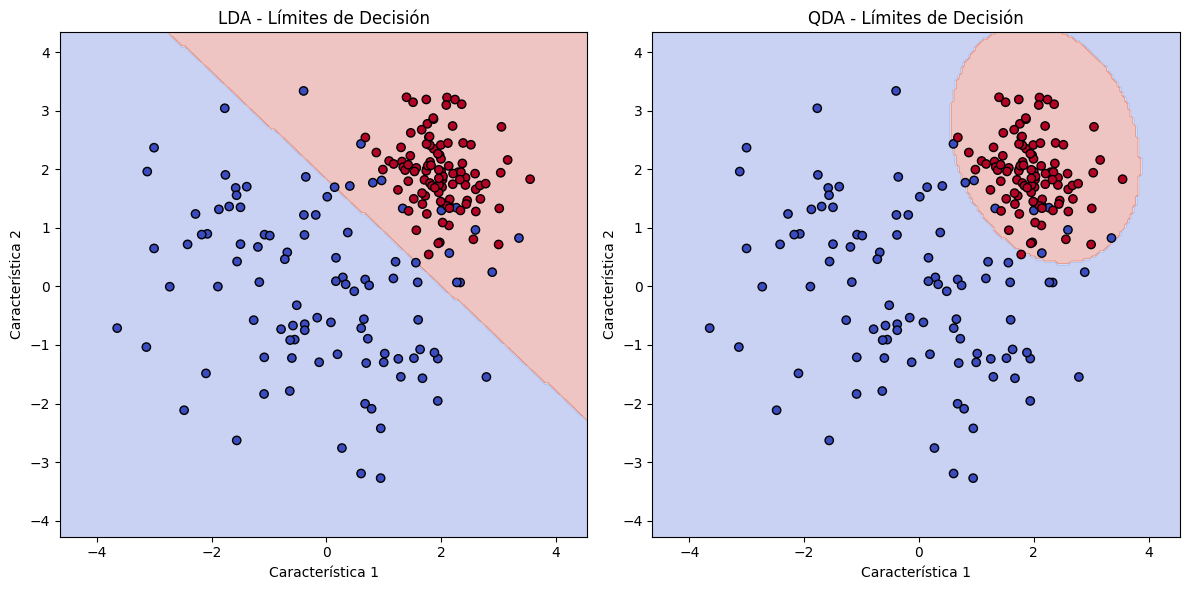

In [20]:
# Crear dos nubes de puntos
X1 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 2]], 100)
X2 = np.random.multivariate_normal([2, 2], [[0.3, 0], [0, 0.3]], 100)
X = np.vstack([X1, X2])

y = np.hstack([np.zeros(100), np.ones(100)])

# Entrenar modelos
lda.fit(X, y)
qda.fit(X, y)

# Crear cuadrícula de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predicciones en la cuadrícula
lda_pred = lda.predict(grid).reshape(xx.shape)
qda_pred = qda.predict(grid).reshape(xx.shape)

# Graficar límites de decisión LDA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, lda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("LDA - Límites de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

# Graficar límites de decisión QDA
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, qda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("QDA - Límites de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.tight_layout()
plt.show()


In [21]:
lda.means_

array([[-0.08629207, -0.01664911],
       [ 1.97876014,  1.95209072]])

In [22]:
qda.means_

array([[-0.08629207, -0.01664911],
       [ 1.97876014,  1.95209072]])

In [23]:
lda.covariance_

array([[ 1.31488368, -0.25153692],
       [-0.25153692,  1.12839674]])

In [24]:
qda.covariance_

[array([[ 2.40164472, -0.4507297 ],
        [-0.4507297 ,  1.92526168]]),
 array([[ 0.25468594, -0.0574257 ],
        [-0.0574257 ,  0.35432769]])]

Means are the same. Covariances are different: while LDA uses the same for both classes, QDA has a different one for each class. This allows more flexibility, drawing a quadratic decision function. This can also cause overfitting.

In [25]:
lda.coef_

array([[1.96921769, 2.16624464]])

coef_ is the weight vector, the direction that maximizes the separation between both classes. This could be important to calculate local and global contributions.

In [26]:
lda.priors_

array([0.5, 0.5])

In [27]:
lda.intercept_

array([-3.95966079])

In [39]:
lda.predict(np.array([[-2, -2]]))

array([0.])

In [63]:
X1 = np.array([2, 2])

X1, lda.coef_

(array([2, 2]), array([[1.96921769, 2.16624464]]))

In [72]:
lda.intercept_

array([-3.95966079])